Подключаем drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np
import pylab as plt
import missingno
from sklearn.preprocessing import LabelEncoder
bin_size = 10

Загрузка Titanic.csv


In [77]:
df = pd.read_csv('/content/drive/MyDrive/Titanic.csv')

Смотрим на потерянные значения, чтобы позже их устранить

<Axes: >

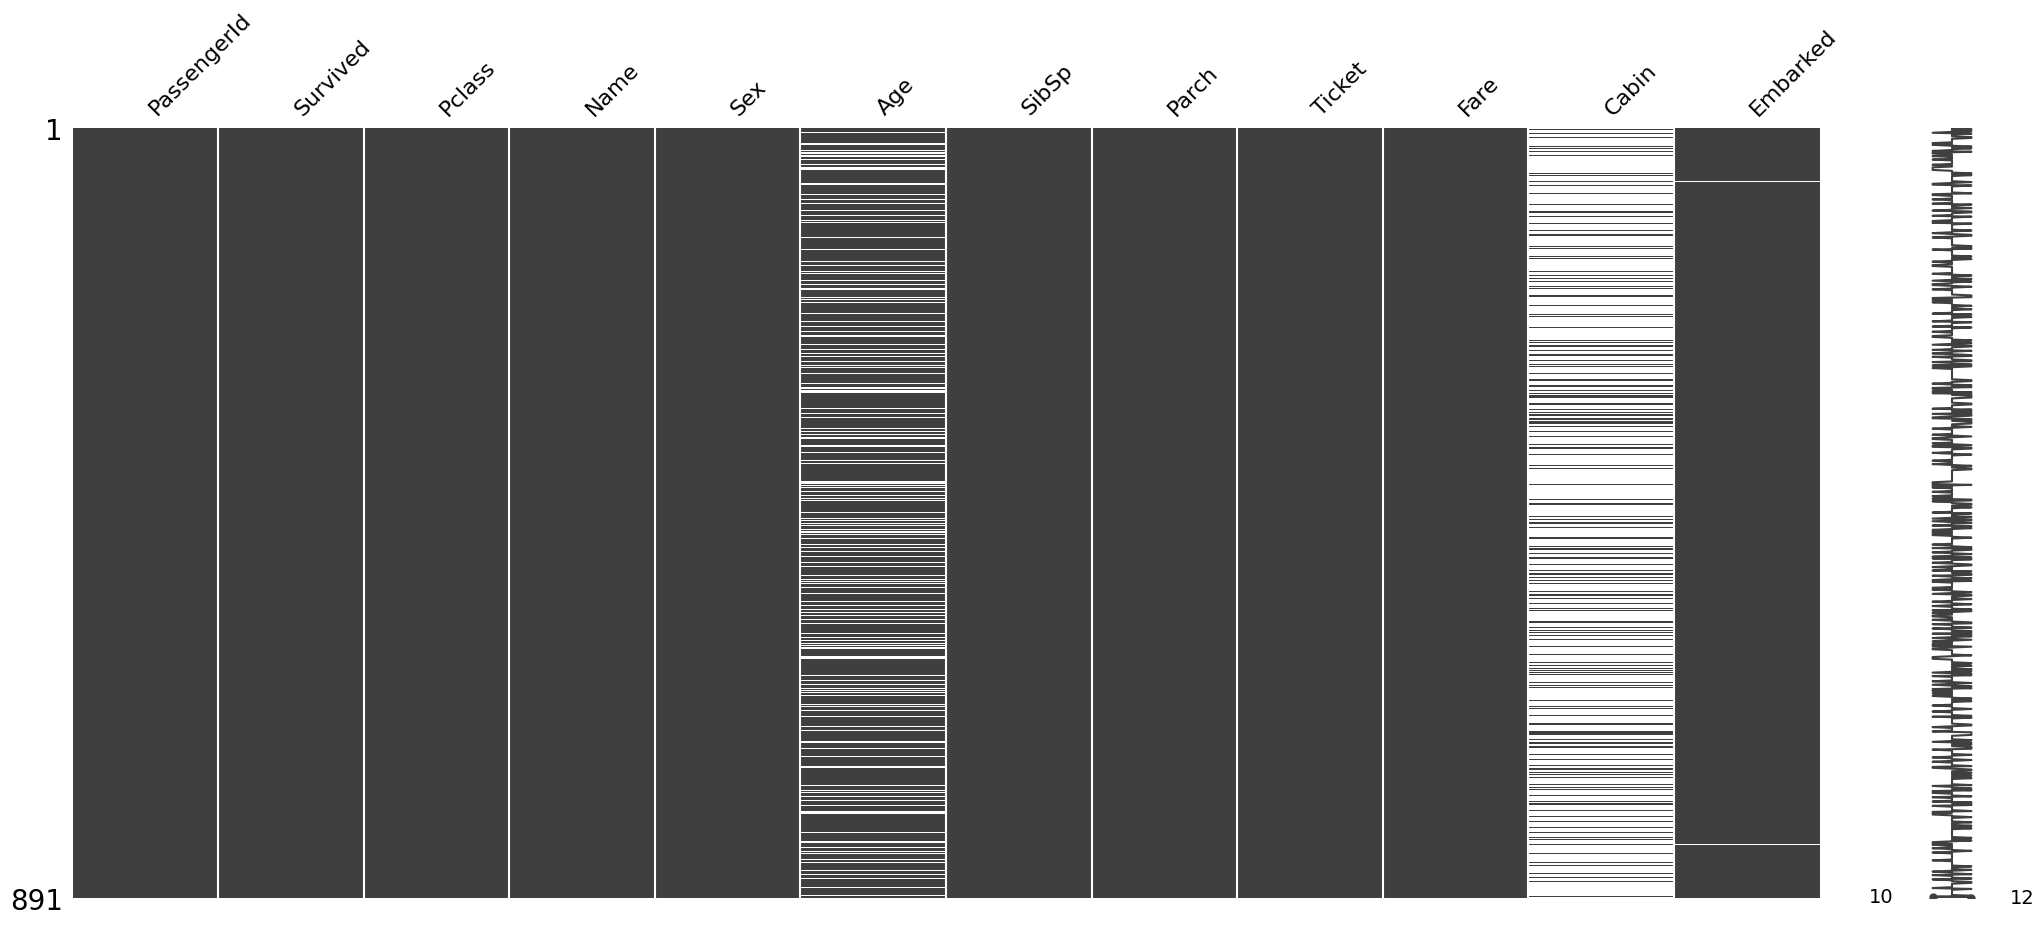

In [78]:
missingno.matrix(df)

Как видим, что нам нужно будет восстановить Age. Cabin можно отбросить, не думаю, что от этого зависит выживаемость, также как и стоимость билета, она зависит от класса пассажира

In [79]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Круговой график выживших и умерших людей.

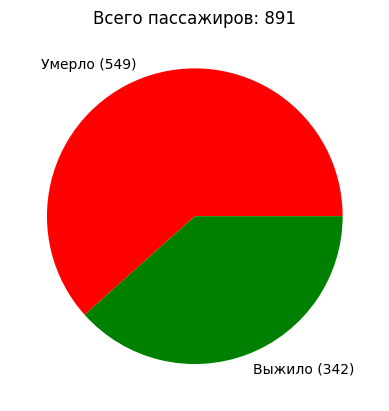

In [80]:
survival_counts = df['Survived'].value_counts()
total_passengers = survival_counts.sum()
plt.pie(survival_counts, labels=[f'Умерло ({survival_counts[0]})', f'Выжило ({survival_counts[1]})'], colors=['red', 'green'])
plt.title(f'Всего пассажиров: {total_passengers}')
plt.show()

Распределение на мужчина/женщина. *💭 Возможно среди мужчин/женщин выживших больше*

<Axes: title={'center': 'Пассажиры'}, xlabel='Sex'>

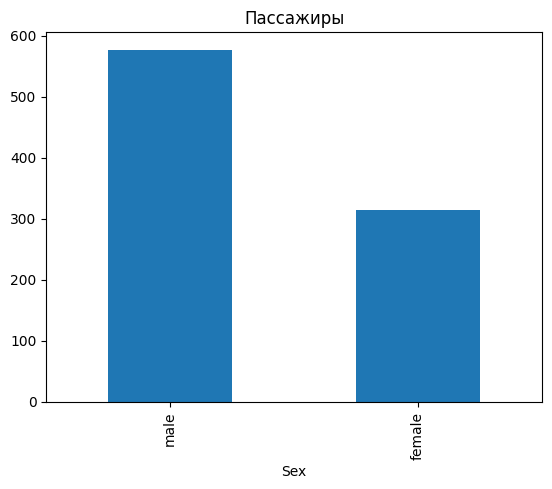

In [81]:
df['Sex'].value_counts().plot(kind='bar', title='Пассажиры')

Распределение по возрасту
*💭 Умерших среди детей меньше/больше*


<Axes: >

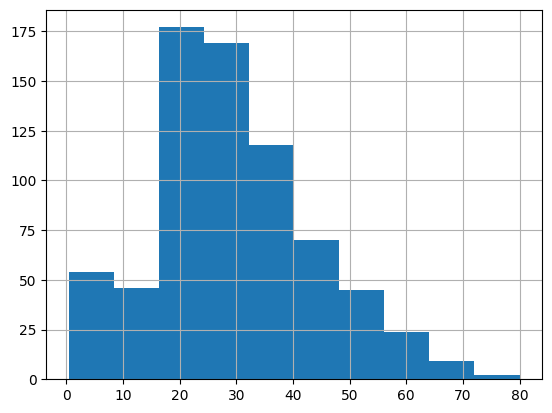

In [82]:
df['Age'].hist()

Распределение по классам *💭 Возможно, в первом/втором/третьем классе выживших намного больше*

<Axes: title={'center': 'Класс пассажира'}, xlabel='Pclass'>

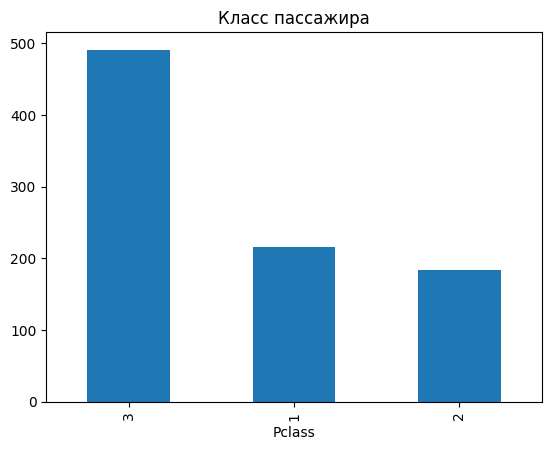

In [83]:
df['Pclass'].value_counts().plot(kind='bar', title='Класс пассажира')

**Гипотеза: выжило больше женщин/мужчин**

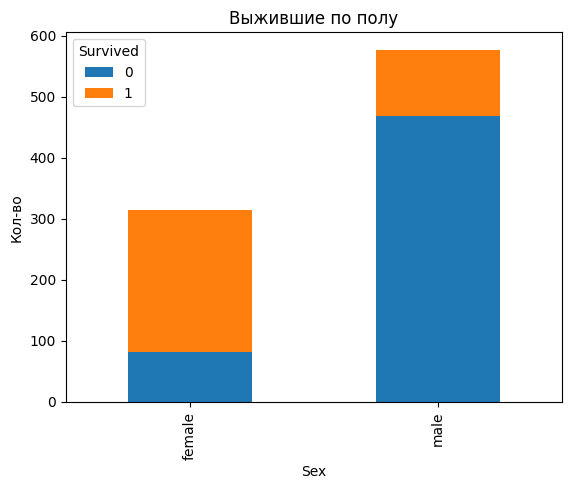

In [84]:
survival_by_sex = df.groupby('Sex')['Survived'].value_counts()
survival_by_sex.unstack().plot(kind='bar', stacked=True, title='Выжившие по полу')
plt.ylabel('Кол-во')
plt.show()

Как видим, выживших среди женщин значительно больше, чем мужчин. **Возможный вывод: Мужчины старались уберечь женщин он гибели.**

**Гипотеза: Среди детей выживших больше/меньше**

Заполняем пропущенные значения возраста средним

In [85]:
df['AgeFill'] = df['Age']
df['AgeFill'] = df['AgeFill'].fillna(df['AgeFill'].median())
missing_agefill_rows = df.loc[df['AgeFill'].isnull()]
df.head()
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeFill
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,28.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,26.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,32.0


смотрим на долю выживших по категориям возраста

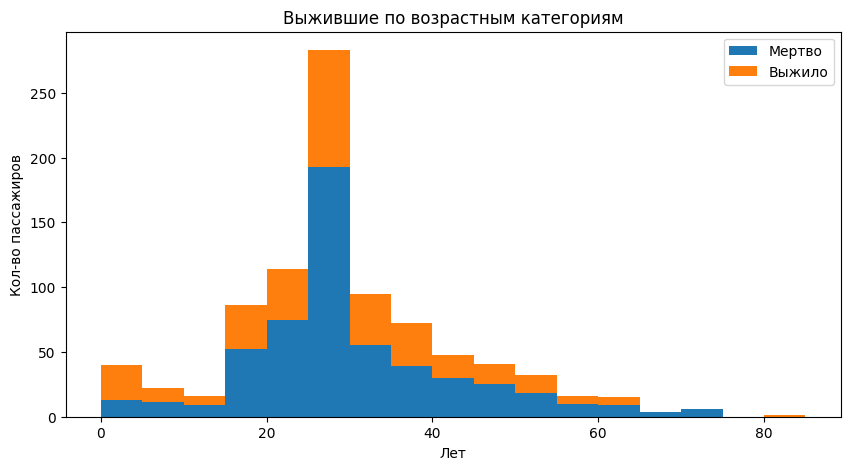

In [86]:
df1 = df[df['Survived'] == 0]['AgeFill']
df2 = df[df['Survived'] == 1]['AgeFill']
max_age = int(df['AgeFill'].max())
fig, axes = plt.subplots(figsize=(10, 5))
axes.hist([df1, df2], bins=np.arange(0, max_age + bin_size, 5), stacked=True)
axes.legend(('Мертво', 'Выжило'), loc='best')
axes.set_title('Выжившие по возрастным категориям')
axes.set_xlabel('Лет')
axes.set_ylabel('Кол-во пассажиров')
plt.show()

Вывод: детей на корабле было довольно таки мало, в сравнении со средним возрастом. Большая часть погибших пришлось на возрастную категорию 30 лет.
*💭Возможно, это были мужчины/женщины*


**Гипотеза: Среди первого/второго/третьего классов выживших больше, чем в остальных**

Посмотрим на график выживаемость среди пассажирских классов

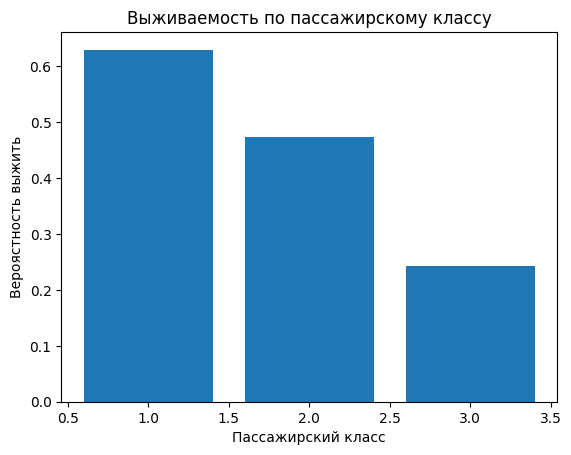

In [87]:
survival_prob = df.groupby('Pclass')['Survived'].mean()
plt.bar(survival_prob.index, survival_prob.values)
plt.xlabel('Пассажирский класс')
plt.ylabel('Вероястность выжить')
plt.title('Выживаемость по пассажирскому классу')
plt.show()

**Вывод:** Первый класс имеет вероятность выживания выше, чем остальные классы. Думаю, это из-за того, что ехала семья элиты, которых спасали намного чаще

Также можно проверить такие гипотезы:


1.   Выживаемость каких семей (коли ужчество родственников) была выше? Или человек был один?
2.   Как зависит выживаемость семей от пассажирского класса?
3.   
4.   Выживаемость по месту посадки?
5.   Выживаемость по стоимости билета?
и тд.

Признаки выживаемости: Семья, Возраст, Пассажирский класс, Порт посадки

**Преобразования**

Пол в числовые данные

In [88]:
le = LabelEncoder()
df['Sex_int_value'] = le.fit_transform(df['Sex'])
df['Sex_int_value'] = df['Sex_int_value'].astype('int64')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeFill,Sex_int_value
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,28.0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0,1


Трансофрмируем embarked столбец в числовой формат
Был ли человек с семьей или же он был один. Заполним дополнительный столбец

In [89]:
df['Embarked_value'] = le.fit_transform(df['Embarked'])
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 0, 'IsAlone'] = 1
df['IsAlone'] = df['IsAlone'].astype('int32')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeFill,Sex_int_value,Embarked_value,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0,2,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,0,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0,1,2,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,0,2,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,28.0,0,2,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0,1,0,0,1


In [90]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


Вырезаем из таблицы PassengerID(Не пригодится при обучении в принципе), Name (Имя не сыграет ролии в вероятности выжить), Sex(Потому что у нас есть числовая альтернатива), Ticket (Не нужен при обучении тк там только название тикета), Cabin(кабина, в которой расположился человек. заполнить ее более-менее правлоподобными значениями не представлялось возможным), Embarked(Есть числовая альтернатива), Age (Есть заполненная альтернатива), SibSp и Parch (есть единый столбец для этого).

In [91]:
df = df.drop(columns=['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age', 'SibSp', 'Parch', 'Fare'])
df

,Survived,Pclass,AgeFill,Sex_int_value,Embarked_value,FamilySize,IsAlone
0,0,3,22.0,1,2,1,0
1,1,1,38.0,0,0,1,0
2,1,3,26.0,0,2,0,1
3,1,1,35.0,0,2,1,0
4,0,3,35.0,1,2,0,1
...,...,...,...,...,...,...,...
886,0,2,27.0,1,2,0,1
887,1,1,19.0,0,2,0,1
888,0,3,28.0,0,2,3,0
889,1,1,26.0,1,0,0,1


In [92]:
df

,Survived,Pclass,AgeFill,Sex_int_value,Embarked_value,FamilySize,IsAlone
0,0,3,22.0,1,2,1,0
1,1,1,38.0,0,0,1,0
2,1,3,26.0,0,2,0,1
3,1,1,35.0,0,2,1,0
4,0,3,35.0,1,2,0,1
...,...,...,...,...,...,...,...
886,0,2,27.0,1,2,0,1
887,1,1,19.0,0,2,0,1
888,0,3,28.0,0,2,3,0
889,1,1,26.0,1,0,0,1


In [93]:
df.isnull().sum()

,0
Survived,0
Pclass,0
AgeFill,0
Sex_int_value,0
Embarked_value,0
FamilySize,0
IsAlone,0


In [94]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [95]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


Modeling

Импортируем

In [96]:
from tensorflow import keras
from keras import regularizers
from keras.optimizers import Nadam
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

Разделяем на тестовую и обучающую выборки и переводим в категориальный формат

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Обучаем нейронную сеть, заранее сделав стандартизацию через scaler

In [98]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.6))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Compile the model
model.compile(optimizer=Nadam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}, val_loss: {loss:.4f}')

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 - 2s - 121ms/step - accuracy: 0.5782 - loss: 0.7211 - val_accuracy: 0.6503 - val_loss: 0.6669
Epoch 2/150
18/18 - 0s - 7ms/step - accuracy: 0.5888 - loss: 0.7038 - val_accuracy: 0.6503 - val_loss: 0.6571
Epoch 3/150
18/18 - 0s - 7ms/step - accuracy: 0.6292 - loss: 0.6844 - val_accuracy: 0.6503 - val_loss: 0.6477
Epoch 4/150
18/18 - 0s - 9ms/step - accuracy: 0.6239 - loss: 0.6805 - val_accuracy: 0.6643 - val_loss: 0.6372
Epoch 5/150
18/18 - 0s - 8ms/step - accuracy: 0.6309 - loss: 0.6593 - val_accuracy: 0.6783 - val_loss: 0.6259
Epoch 6/150
18/18 - 0s - 25ms/step - accuracy: 0.6397 - loss: 0.6694 - val_accuracy: 0.6783 - val_loss: 0.6162
Epoch 7/150
18/18 - 1s - 29ms/step - accuracy: 0.6274 - loss: 0.6519 - val_accuracy: 0.7063 - val_loss: 0.6063
Epoch 8/150
18/18 - 0s - 16ms/step - accuracy: 0.6872 - loss: 0.6292 - val_accuracy: 0.7133 - val_loss: 0.5938
Epoch 9/150
18/18 - 0s - 10ms/step - accuracy: 0.6626 - loss: 0.6335 - val_accuracy: 0.7133 - val_loss: 0.5830
Epoch 10/150
18/

Строим графики

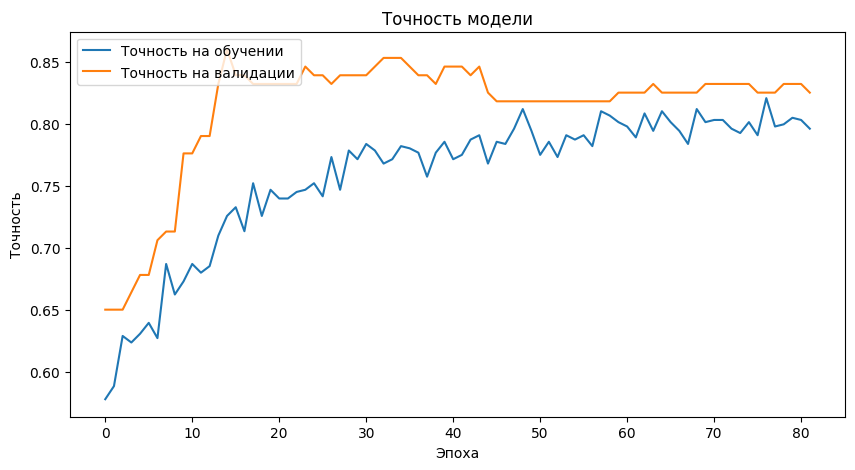

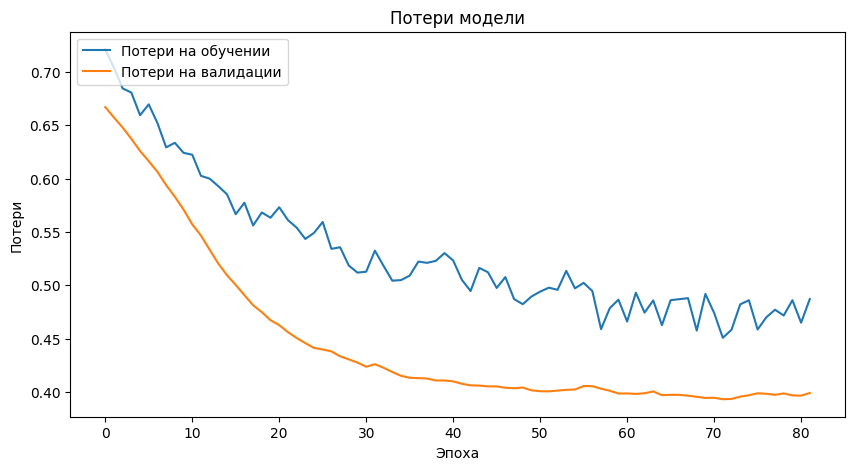

In [99]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label="Точность на обучении")
plt.plot(history.history['val_accuracy'], label="Точность на валидации")
plt.title("Точность модели")
plt.xlabel("Эпоха")
plt.ylabel("Точность")
plt.legend(loc="upper left")
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label="Потери на обучении")
plt.plot(history.history['val_loss'], label="Потери на валидации")
plt.title("Потери модели")
plt.xlabel("Эпоха")
plt.ylabel("Потери")
plt.legend(loc='upper left')
plt.show()